# Import Libraries

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import tkinter as tk
from tkinter.scrolledtext import ScrolledText
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

# Load data

In [12]:
categories = ['SPORTS', 'BUSINESS', 'EDUCATION']
df = pd.read_csv('./data/news-article-categories.csv', usecols=['title','category'])
# print(df.head())
# print(df.tail())
category_counts = df['category'].value_counts()
print(category_counts)

category
ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: count, dtype: int64


# Filtering Data

In [14]:
data = []
for category in categories:
    category_data = df[df['category'] == category.upper()]
    # Append the category data to the list
    data.append(category_data)

# Concatenate the category data into a single DataFrame
df = pd.concat(data)

filtered_category_counts = df['category'].value_counts()
print(filtered_category_counts)

null_rows = df[df.isnull().any(axis=1)]

# Display null rows
print(f'Null rows:\n{null_rows}')

print(df.head())
print(df.tail())


category
SPORTS       501
BUSINESS     501
EDUCATION    490
Name: count, dtype: int64
Null rows:
Empty DataFrame
Columns: [category, title]
Index: []
     category                                              title
5374   SPORTS  Jets Chairman Christopher Johnson Won't Fine P...
5375   SPORTS      Trump Posthumously Pardons Boxer Jack Johnson
5376   SPORTS       NFL Bans Kneeling During The National Anthem
5377   SPORTS       The History Of The National Anthem In Sports
5378   SPORTS  Israeli Soccer Team Beitar Jerusalem To Add 'T...
       category                                              title
2668  EDUCATION  Cheryl Williams, The Mentor Who Goes Above And...
2669  EDUCATION              Excuses ‘R' Us Is Closed For Business
2670  EDUCATION     Thomas Whitby's Ascent As a Connected Educator
2671  EDUCATION  Developing Resiliency in Lethal School Violenc...
2672  EDUCATION             Our First Teachers: Moms and Education


# TF-IDF vectorization

In [15]:
# Concatenate 'category' and 'title' columns
df['title'] = df['category'] + ' ' + df['title']

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)

# Fit the vectorizer on concatenated text
X = vectorizer.fit_transform(df['title'])
# Print the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (1492, 1568)


# Elbow method  vs Silhouette score method:

/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

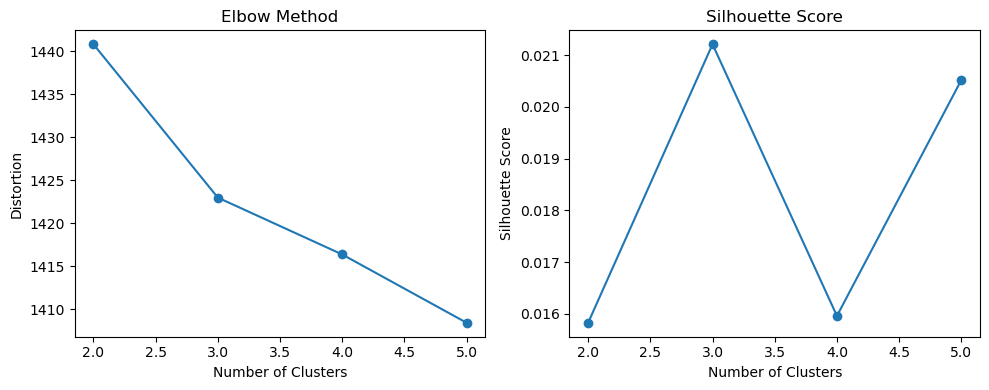

In [16]:
# Define range of clusters to evaluate
range_n_clusters = range(2, 6)
distortions = []
silhouette_scores = []

# Calculate distortions and silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    kmodel = KMeans(n_clusters=n_clusters, random_state=42)
    kmodel.fit(X)
    distortions.append(kmodel.inertia_)
    silhouette_scores.append(silhouette_score(X, kmodel.labels_))

# Plot results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# KMeans clustering

In [17]:
# KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=10, random_state=42)
kmeans.fit(X)

# Assuming kmeans is your fitted KMeans model
unique_clusters = len(set(kmeans.labels_))

print("Number of clusters:", unique_clusters)

unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)

# Print unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Cluster: {label}, Count: {count} documents")


Number of clusters: 3
Cluster: 0, Count: 501 documents
Cluster: 1, Count: 489 documents
Cluster: 2, Count: 502 documents


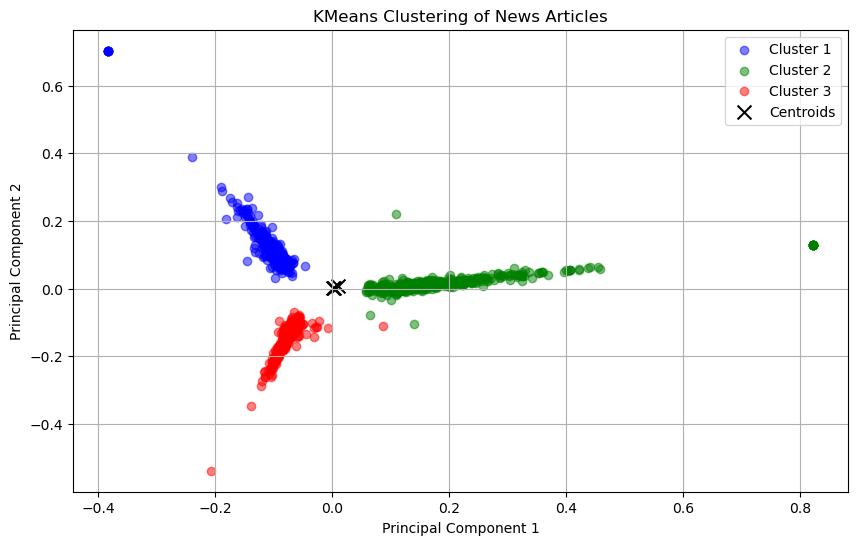

In [18]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(X.toarray())
n_clusters = 3
# Plot clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red','yellow']
for i in range(n_clusters):
    plt.scatter(tfidf_reduced[kmeans.labels_ == i, 0], tfidf_reduced[kmeans.labels_ == i, 1], 
                c=colors[i], label='Cluster ' + str(i + 1), alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.title('KMeans Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# find unique category with cluster number

In [20]:

labels = kmeans.labels_
wiki_cl=pd.DataFrame(list(zip(df['category'],labels)),columns=['category','cluster']) 
unique_category_cluster = wiki_cl.drop_duplicates()
print(unique_category_cluster)

       category  cluster
0        SPORTS        2
501    BUSINESS        0
1002  EDUCATION        1
1304  EDUCATION        2


# predict Cluster Method

In [22]:
def get_category(cluster):
    return {
        0: 'BUSINESS',
        1: 'EDUCATION',
        2: 'SPORTS'
    }.get(cluster, 'Unknown')

def predict_cluster_and_category(input_text):
    input_vector = vectorizer.transform([input_text])
    print(input_vector)
    cluster = kmeans.predict(input_vector)[0]
    category = df.iloc[cluster]['category']
    
    print("Predicted cluster:", cluster)

    return cluster, get_category(cluster)

# User Interface

In [ ]:
# Tkinter GUI
window = tk.Tk()
window.title("Document Clustering")
window.minsize(600, 400)

text_box = ScrolledText(window)
text_box.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")

predicted_cluster_label = tk.Label(window, text="Predicted Cluster:")
predicted_cluster_label.grid(row=1, column=0, padx=5, pady=5, sticky="w")

predicted_category_label = tk.Label(window, text="Predicted Category:")
predicted_category_label.grid(row=2, column=0, padx=5, pady=5, sticky="w")

def process_input():
    input_text = text_box.get("1.0", tk.END)
    predicted_cluster, category = predict_cluster_and_category(input_text)
    predicted_cluster_label.config(text=f"Predicted Cluster: {predicted_cluster}")
    predicted_category_label.config(text=f"Predicted Category: {category}")
    print("Predicted Cluster:", predicted_cluster)
    print("Category Name:", category)

# Tkinter GUI components
btn = tk.Button(window, text="Cluster Documents", command=process_input)
btn.grid(row=3, column=0, padx=5, pady=5)

window.mainloop()

  (0, 1370)	0.5422688435408567
  (0, 912)	0.8036297369862316
  (0, 443)	0.24520144199474467
Predicted cluster: 1
Predicted Cluster: 1
Category Name: EDUCATION


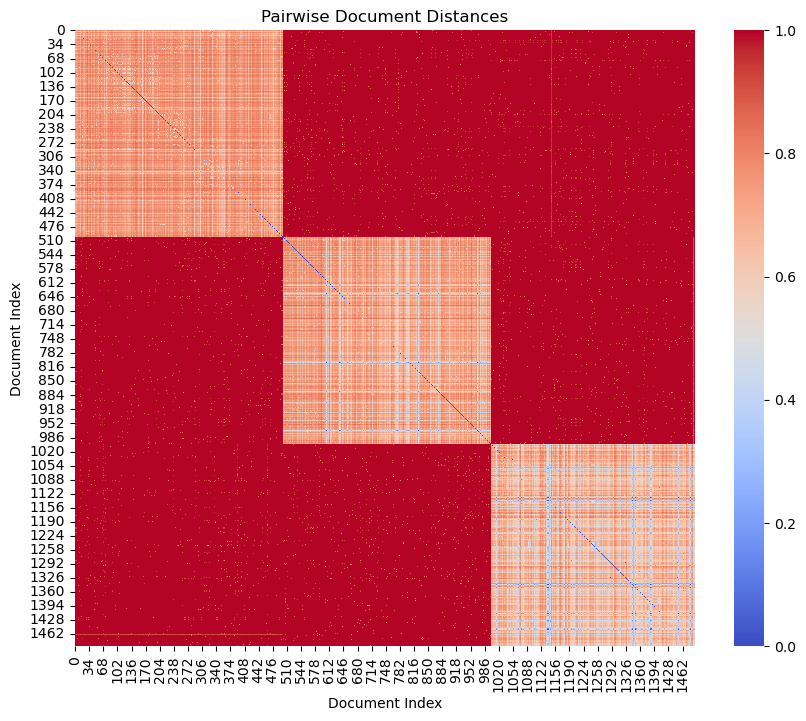

In [476]:
import numpy as np
import seaborn as sns
from sklearn.metrics import pairwise_distances

# Assuming tfidf_matrix is your document-term matrix or feature matrix
# Calculate pairwise distances between documents
distances = pairwise_distances(X, metric='cosine')

# Plot the distances as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='coolwarm', annot=False)
plt.title('Pairwise Document Distances')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

category
SPORTS       501
BUSINESS     501
EDUCATION    490
Name: count, dtype: int64


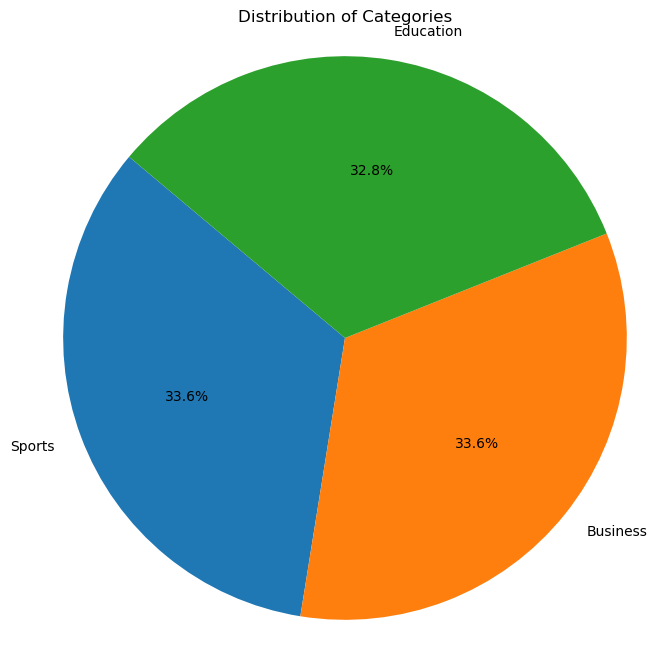

In [477]:
labels = ['Sports', 'Business', 'Education']
category_counts = df['category'].value_counts()
print(category_counts)
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

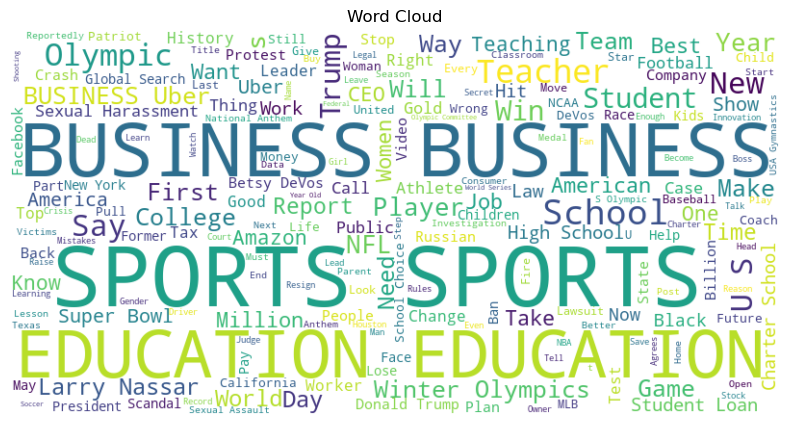

In [478]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text_data = ' '.join(df['title'].tolist())
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


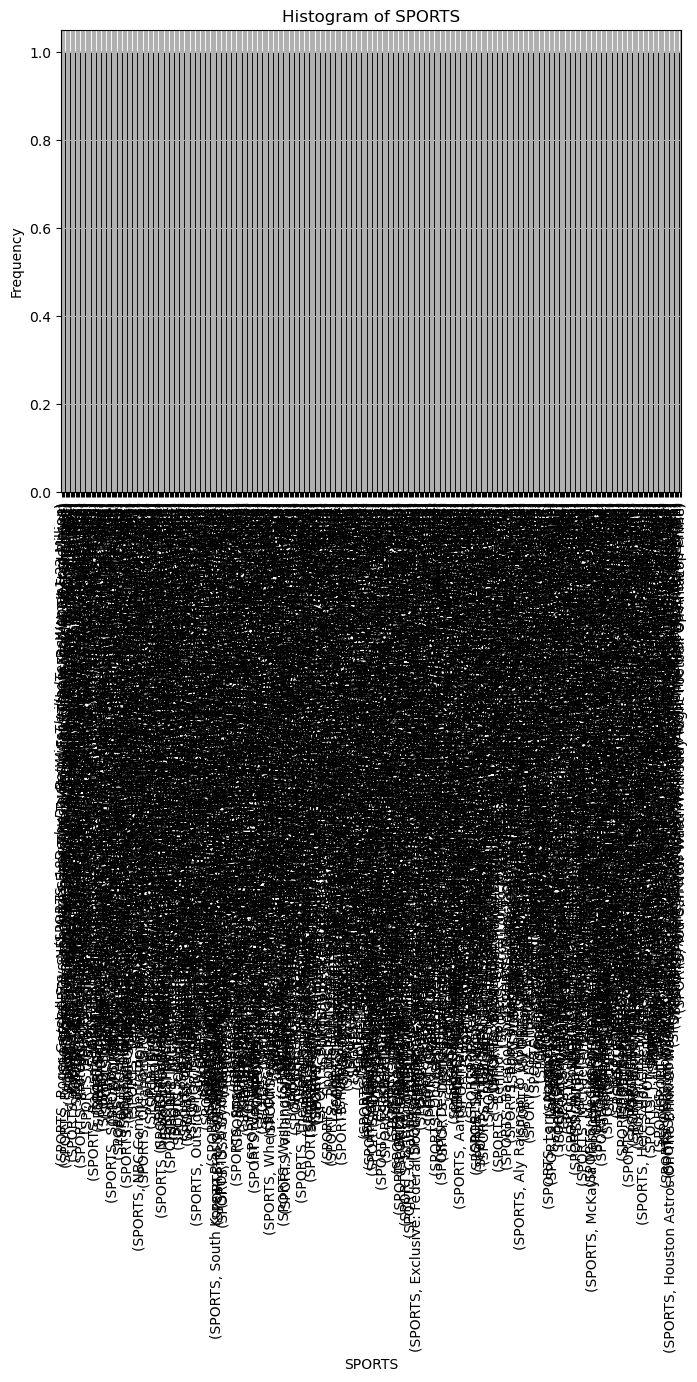

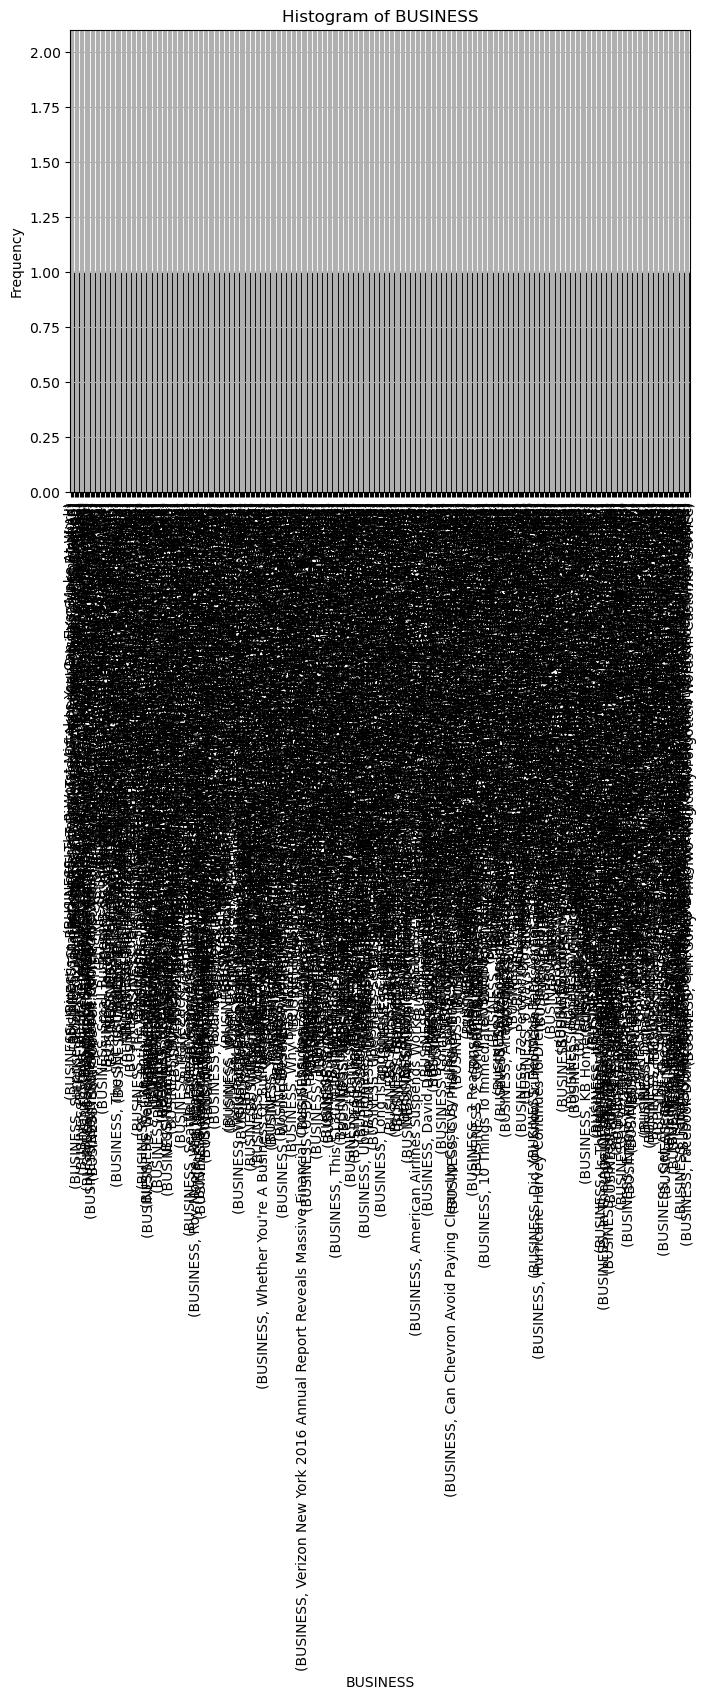

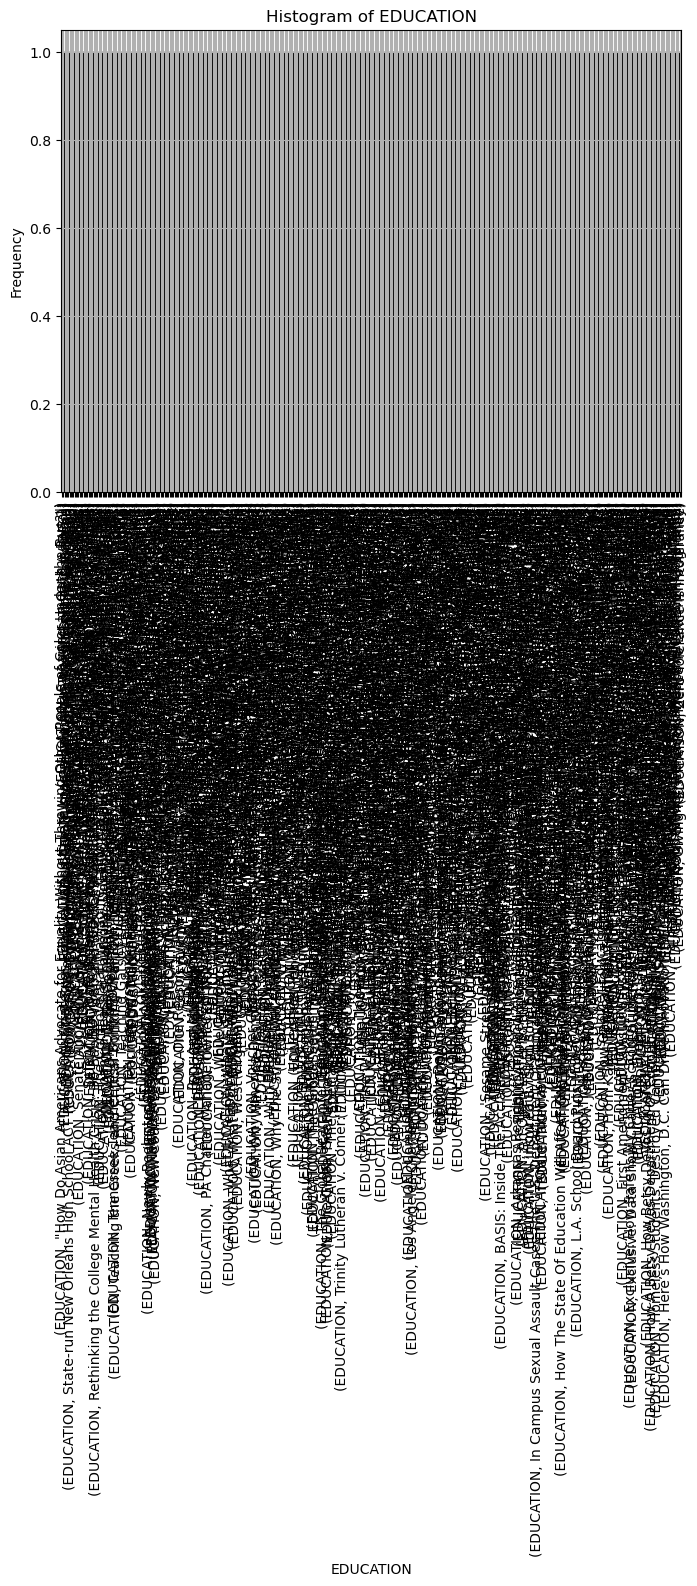

In [479]:
categorical_cols = ['SPORTS', 'BUSINESS', 'EDUCATION']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    result[result['category'] == col.upper()].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

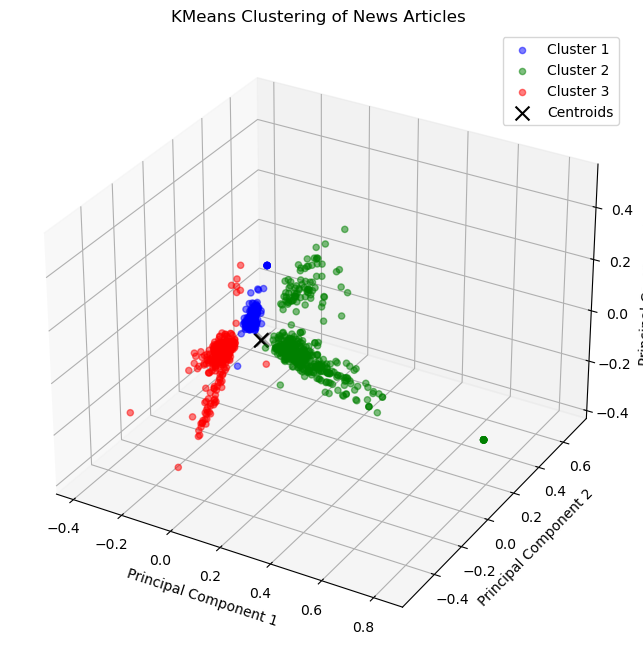

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensionality for visualization
pca = PCA(n_components=3)  # Change the number of components to 3
tfidf_reduced = pca.fit_transform(X.toarray())

# Plot clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'green', 'red']
for i in range(n_clusters):
    ax.scatter(tfidf_reduced[kmeans.labels_ == i, 0], tfidf_reduced[kmeans.labels_ == i, 1], tfidf_reduced[kmeans.labels_ == i, 2], 
               c=colors[i], label='Cluster ' + str(i + 1), alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           marker='x', s=100, c='black', label='Centroids')
ax.set_title('KMeans Clustering of News Articles')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


     category  cluster
745  BUSINESS        0
651  BUSINESS        0
652  BUSINESS        0
653  BUSINESS        0
654  BUSINESS        0
..        ...      ...
341    SPORTS        2
342    SPORTS        2
343    SPORTS        2
330    SPORTS        2
0      SPORTS        2

[1492 rows x 2 columns]
       category  cluster
0        SPORTS        2
501    BUSINESS        0
1002  EDUCATION        1
